In [0]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0cee49e7a73dd002294ab1d00ce4e5a040ed0e0379b07b8b13ea92b3cdb019f7
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import face_recognition

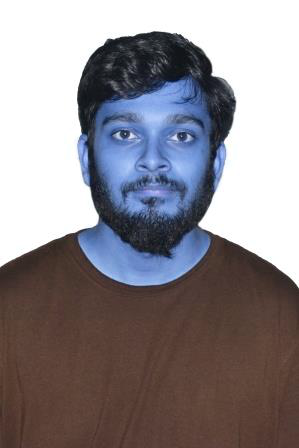

In [0]:
import os
os.getcwd()
from google.colab.patches import cv2_imshow
image = face_recognition.load_image_file("/content/known_faces/saransh/DSC_2179 (2).JPG")
import cv2
cv2_imshow(image)

# New Section

Loading known faces...
saransh
.ipynb_checkpoints
Processing unknown faces...
Filename aa.jpg, found 21 face(s)
 - saransh from [True]


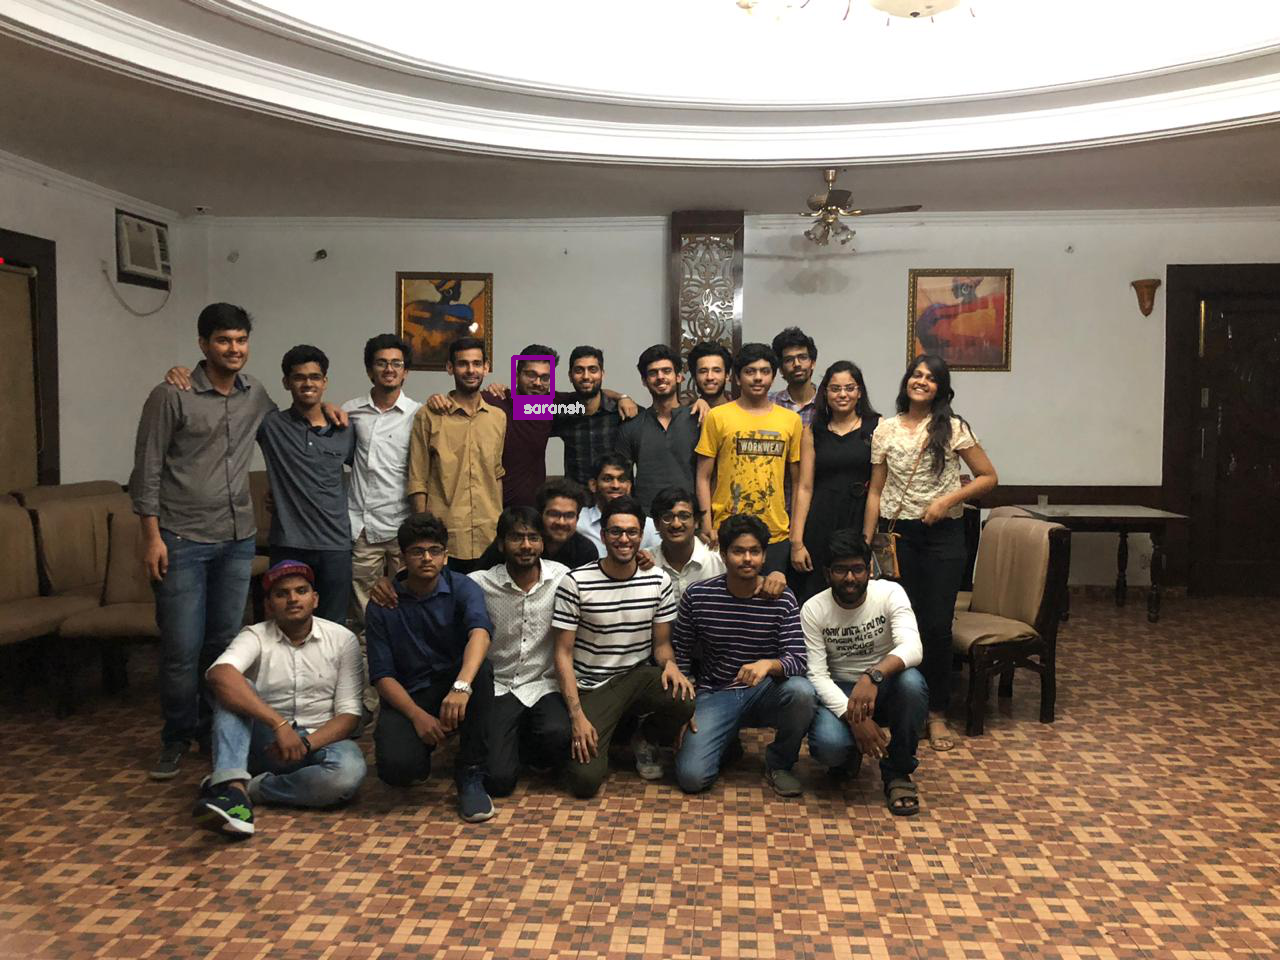

Filename .ipynb_checkpoints

IsADirectoryError: ignored

In [0]:
import os
import face_recognition
import pandas
import numpy
import cv2
KNOWN_FACES_DIR = 'known_faces'
UNKNOWN_FACES_DIR = 'unknown_faces'
TOLERANCE = 0.51
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'
print('Loading known faces...')
known_faces = []
known_names = []
def name_to_color(name):
    # Take 3 first letters, tolower()
    # lowercased character ord() value rage is 97 to 122, substract 97, multiply by 8
    color = [(ord(c.lower())-97)*8 for c in name[:3]]
    return color
for name in os.listdir(KNOWN_FACES_DIR):
    print(name)
    # Next we load every file of faces of known person
    for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):
        # Load an image
        image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')
        encoding = face_recognition.face_encodings(image)[0]
        # Append encodings and name
        known_faces.append(encoding)
        known_names.append(name)
print('Processing unknown faces...')
# Now let's loop over a folder of faces we want to label
for filename in os.listdir(UNKNOWN_FACES_DIR):
    # Load image
    print(f'Filename {filename}', end='')
    image = face_recognition.load_image_file(f'{UNKNOWN_FACES_DIR}/{filename}')
   # This time we first grab face locations - we'll need them to draw boxes
    locations = face_recognition.face_locations(image, model=MODEL)
    # Now since we know loctions, we can pass them to face_encodings as second argument
    # Without that it will search for faces once again slowing down whole process
    encodings = face_recognition.face_encodings(image, locations)
    # We passed our image through face_locations and face_encodings, so we can modify it
    # First we need to convert it from RGB to BGR as we are going to work with cv2
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # But this time we assume that there might be more faces in an image - we can find faces of dirrerent people
    print(f', found {len(encodings)} face(s)')
    for face_encoding, face_location in zip(encodings, locations):
        # We use compare_faces (but might use face_distance as well)
        # Returns array of True/False values in order of passed known_faces
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        # Since order is being preserved, we check if any face was found then grab index
        # then label (name) of first matching known face withing a tolerance
        match = None
        if True in results:  # If at least one is true, get a name of first of found labels
            match = known_names[results.index(True)]
            print(f' - {match} from {results}')
            # Each location contains positions in order: top, right, bottom, left
            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])
            # Get color by name using our fancy function
            color = name_to_color(match)
            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)
            # Now we need smaller, filled grame below for a name
            # This time we use bottom in both corners - to start from bottom and move 50 pixels down
            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)
            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
            # Wite a name
            cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)
    # Show image
    cv2_imshow(image)
    cv2.waitKey(1000)
 